In [6]:
# Load dataset
# Basic NLP processing, tokenization, word count, ..
# Good book http://victoria.lviv.ua/html/fl5/NaturalLanguageProcessingWithPython.pdf

In [16]:
import nltk

In [17]:
# Only run once: download all packages from the book
# nltk.download()

In [75]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [76]:
t = "Here is some sample text."

print(word_tokenize(t))

['Here', 'is', 'some', 'sample', 'text', '.']


In [20]:
import pandas as pd
df = pd.read_csv('data/data-19-07-2017.csv', sep=',', index_col=[0])

In [21]:
df[:2]

,UserID,UserIP,Timestamp,DateTime,Event,ImageID,Type
LogID,,,,,,,
15,1,127.0.0.1,1500370828,2017-07-18 11:40:28.201,page loaded,15,None
16,1,127.0.0.1,1500370837,2017-07-18 11:40:37.805,page loaded,16,None


In [22]:
df_submitted = df[df.Event == 'submitted']
df_submitted[:2]

,UserID,UserIP,Timestamp,DateTime,Event,ImageID,Type
LogID,,,,,,,
18,1,127.0.0.1,1500370844,2017-07-18 11:40:44.500,submitted,16,scatter plot
21,1,127.0.0.1,1500370854,2017-07-18 11:40:54.023,submitted,17,bar chart


In [45]:
txt = df_submitted.Type.apply(word_tokenize)

In [46]:
txt[:2]

LogID
18    [scatter, plot]
21       [bar, chart]
Name: Type, dtype: object

In [63]:
# returns a generator
txt_merged = (item for item in df_submitted.Type)

In [64]:
txt_joined = " ".join(list(a))
txt_joined

'scatter plot bar chart scatter plot line chart bar chart pie chart line chart bar chart pie chart line chart pie chart bar chart line chart bar chart pie chart bar chart scatter plot line chart scatter plot line chart scatter plot bar chaty line chart pie chart line chart bar chart line chart scatter plot line chart diagram of the cause of mortality diagram of the cause of mortality None None minard map diagram of the causes of mortality scatter plot pie chart bar chart line chart bar chart line chart pie chart line chart scatter plot line chart pie chart line chart pie chat line chart scatter plot toto'

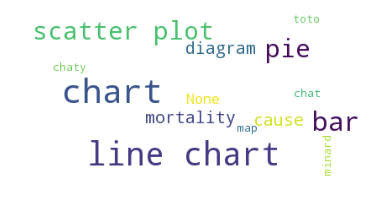

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(background_color="white", max_font_size=40).generate(txt_joined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
tokens = word_tokenize(txt_joined)
tokens

['scatter',
 'plot',
 'bar',
 'chart',
 'scatter',
 'plot',
 'line',
 'chart',
 'bar',
 'chart',
 'pie',
 'chart',
 'line',
 'chart',
 'bar',
 'chart',
 'pie',
 'chart',
 'line',
 'chart',
 'pie',
 'chart',
 'bar',
 'chart',
 'line',
 'chart',
 'bar',
 'chart',
 'pie',
 'chart',
 'bar',
 'chart',
 'scatter',
 'plot',
 'line',
 'chart',
 'scatter',
 'plot',
 'line',
 'chart',
 'scatter',
 'plot',
 'bar',
 'chaty',
 'line',
 'chart',
 'pie',
 'chart',
 'line',
 'chart',
 'bar',
 'chart',
 'line',
 'chart',
 'scatter',
 'plot',
 'line',
 'chart',
 'diagram',
 'of',
 'the',
 'cause',
 'of',
 'mortality',
 'diagram',
 'of',
 'the',
 'cause',
 'of',
 'mortality',
 'None',
 'None',
 'minard',
 'map',
 'diagram',
 'of',
 'the',
 'causes',
 'of',
 'mortality',
 'scatter',
 'plot',
 'pie',
 'chart',
 'bar',
 'chart',
 'line',
 'chart',
 'bar',
 'chart',
 'line',
 'chart',
 'pie',
 'chart',
 'line',
 'chart',
 'scatter',
 'plot',
 'line',
 'chart',
 'pie',
 'chart',
 'line',
 'chart',
 'pie',
 'c

In [71]:
# https://github.com/amueller/word_cloud/blob/master/examples/simple.py
fdist = FreqDist(tokens)
fdist

FreqDist({'None': 2,
          'bar': 10,
          'cause': 2,
          'causes': 1,
          'chart': 33,
          'chat': 1,
          'chaty': 1,
          'diagram': 3,
          'line': 16,
          'map': 1,
          'minard': 1,
          'mortality': 3,
          'of': 6,
          'pie': 9,
          'plot': 9,
          'scatter': 9,
          'the': 3,
          'toto': 1})

In [87]:
fdist.most_common(10)

[('chart', 33),
 ('line', 16),
 ('bar', 10),
 ('scatter', 9),
 ('plot', 9),
 ('pie', 9),
 ('of', 6),
 ('mortality', 3),
 ('the', 3),
 ('diagram', 3)]

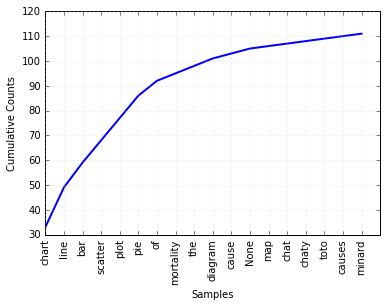

In [72]:
fdist.plot(50, cumulative=True)

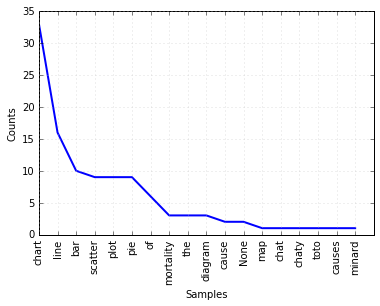

In [88]:
fdist.plot(50, cumulative=False)

In [79]:
set(tokens)

{'None',
 'bar',
 'cause',
 'causes',
 'chart',
 'chat',
 'chaty',
 'diagram',
 'line',
 'map',
 'minard',
 'mortality',
 'of',
 'pie',
 'plot',
 'scatter',
 'the',
 'toto'}

In [84]:
def lexical_diversity(text):
    return len(text) / len(set(text)) 

def percentage(count, total):
    return 100 * count / total

In [85]:
lexical_diversity(tokens)

6.166666666666667

In [86]:
percentage(tokens.count("toto"), len(tokens))

0.9009009009009009

In [98]:
# total number of samples
fdist.N()

111

In [101]:
nltk.pos_tag(text)

NameError: name 'text' is not defined

## Using WordNet

In [36]:
from nltk.corpus import wordnet as wn

In [37]:
blue = wn.synsets('blue')[0]

In [38]:
blue

Synset('blue.n.01')

In [39]:
blue.definition()

'blue color or pigment; resembling the color of the clear sky in the daytime'

In [40]:
 blue.hypernyms()

[Synset('chromatic_color.n.01')]

In [41]:
 blue.hypernyms()[0].hypernyms()

[Synset('color.n.01')]

In [42]:
 blue.hypernyms()[0].hypernyms()[0].hypernyms()

[Synset('visual_property.n.01')]

In [43]:
 blue.hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()

[Synset('property.n.02')]

In [52]:
 wn.synsets("blue")

[Synset('blue.n.01'),
 Synset('blue.n.02'),
 Synset('blue.n.03'),
 Synset('blue_sky.n.01'),
 Synset('bluing.n.01'),
 Synset('amobarbital_sodium.n.01'),
 Synset('blue.n.07'),
 Synset('blue.v.01'),
 Synset('blue.s.01'),
 Synset('blue.s.02'),
 Synset('gloomy.s.02'),
 Synset('blasphemous.s.02'),
 Synset('blue.s.05'),
 Synset('aristocratic.s.01'),
 Synset('blue.s.07'),
 Synset('blue.s.08')]

See in WordNet http://wordnetweb.princeton.edu/perl/webwn?o2=&o0=1&o8=1&o1=1&o7=&o5=&o9=&o6=&o3=&o4=&r=1&s=blue&i=2&h=1000000000000000000#c

In [91]:
from nltk.book import *

In [92]:
list(bigrams(['bar', 'chart', 'said', 'than', 'done']))

NameError: name 'bigrams' is not defined

# POS Tagging

In [104]:
nltk.pos_tag(tokens)

AttributeError: 'list' object has no attribute 'isdigit'

# Graph Visualization

https://plot.ly/python/network-graphs/

In [106]:
# Create a graph by word similarity
# https://stackoverflow.com/questions/30829382/check-the-similarity-between-two-words-with-nltk-with-python